### Callin Switzer
###

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import csv
import time
from scipy import signal
import itertools as it
import sys
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import scipy.io
import glob
import itertools

# Neural net libs
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
print("TensorFlow successfully installed.")
if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")

print(sys.version, "\n")
print("last run on " + str(datetime.now()))

C:\Users\calli\Anaconda3\envs\tfcpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


TensorFlow successfully installed.
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-08-30 15:00:16.835393


In [2]:
# data directory
dataDir = r"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\Data"

# figure directory
figDir = r"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\Figures" 
if not os.path.exists(figDir):
    os.makedirs(figDir)
    
# data output
dataOut = r"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\DataOut" 
if not os.path.exists(dataOut):
    os.makedirs(dataOut)

In [3]:
# read in data
#"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\Data\emglength_8_28.csv"

In [4]:
musLen = pd.read_csv(os.path.join(dataDir, "emglength_8_28.csv"))
musLen.drop(axis = 1, columns=musLen.columns[0], inplace=True)
print(musLen.shape)
#musLen["sec2"] = np.round(musLen.sec, decimals=4)
musLen.head(20)

(225009, 3)


,len,EMG,sec
0,-0.255774,0.058332,0.00000
1,-0.239091,0.058990,0.00004
2,-0.222407,0.059319,0.00008
3,-0.205724,0.059319,0.00012
4,-0.189040,0.058990,0.00016
5,-0.172357,0.058990,0.00020
6,-0.155673,0.058661,0.00024
7,-0.138990,0.060305,0.00028
8,-0.122306,0.058332,0.00032
9,-0.105623,0.056688,0.00036


In [5]:
comF = musLen

In [6]:
print(comF.shape)
comF.tail()

(225009, 3)


,len,EMG,sec
225004,-0.311007,0.023152,0.99984
225005,-0.313762,0.022494,0.99988
225006,-0.316516,0.023481,0.99992
225007,-0.319271,0.022165,0.99996
225008,-0.322025,0.021837,1.00000


In [7]:
sm = comF.iloc[0:25000, ].copy()


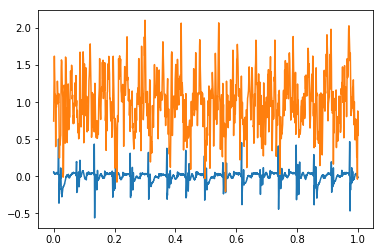

In [8]:
#plt.plot(sm.timestamp, sm.EMG)
plt.plot(sm.sec, sm.EMG)
#plt.show()
plt.plot(sm.sec, sm.len + 1)

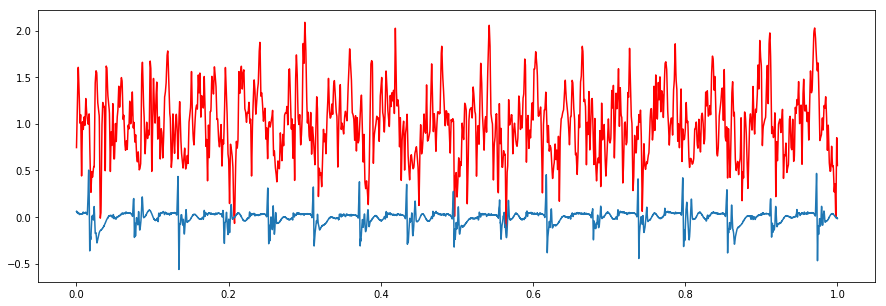

In [9]:
from scipy.signal import savgol_filter
yhat = savgol_filter(sm.len + 1, 21, 3) # window size 51, polynomial order 3

#plt.plot(sm.sec2,sm.length + 1)
plt.figure(figsize = (15, 5))
plt.plot(sm.sec,yhat, color='red')
plt.plot(sm.sec, sm.EMG)
plt.show()

In [10]:
from FFTUtils import * 

In [11]:
# plot FFT spectrum
spect = FFT(sm.len, log_rate = 25000.0)

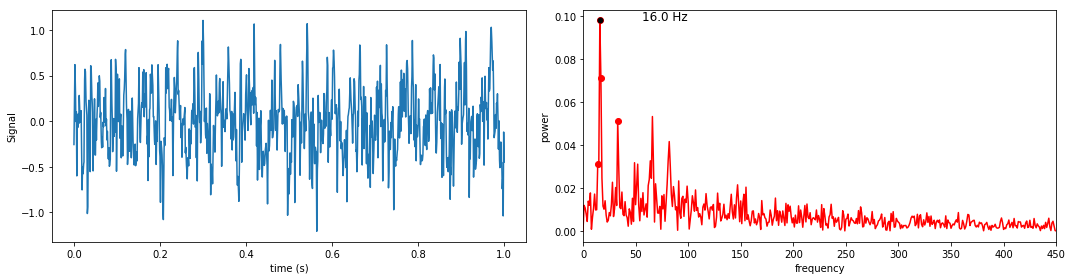

In [12]:
spect.FFT(fmin = 10, fmax = 45)
spect.plotFFT(fmin = 0, fmax =450)

In [13]:
# scale data


In [14]:
comF["ID"] = np.floor(comF.index / 25001).astype(int)

In [15]:
comF.groupby('ID').count()

,len,EMG,sec
ID,,,
0,25001,25001,25001
1,25001,25001,25001
2,25001,25001,25001
3,25001,25001,25001
4,25001,25001,25001
5,25001,25001,25001
6,25001,25001,25001
7,25001,25001,25001
8,25001,25001,25001


In [16]:
comF.head()

,len,EMG,sec,ID
0,-0.255774,0.058332,0.00000,0
1,-0.239091,0.058990,0.00004,0
2,-0.222407,0.059319,0.00008,0
3,-0.205724,0.059319,0.00012,0
4,-0.189040,0.058990,0.00016,0


In [17]:
# split apply combine
grouped = comF.groupby("ID")
grouped

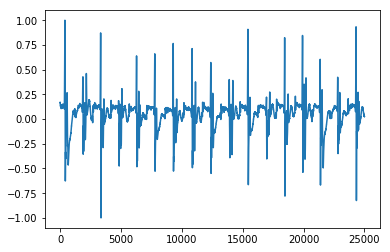

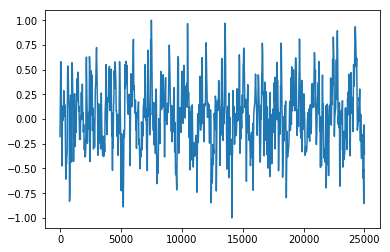

In [18]:
from sklearn.preprocessing import minmax_scale
comF['EMG_scaled'] = comF.groupby('ID').EMG.transform(lambda x: minmax_scale(x.astype(float), feature_range = (-1,1)))
comF['len_scaled'] = comF.groupby('ID').len.transform(lambda x: minmax_scale(x.astype(float), feature_range= (-1,1)))

plt.plot(comF.EMG_scaled[0:25001])
plt.show()
plt.plot(comF.len_scaled[0:25001])

___
# practice with made-up data
# tutorial here: https://www.youtube.com/watch?v=2np77NOdnwk
___

In [162]:

trainX = comF["EMG_scaled"][0:50000]
trainY =  comF["len_scaled"][0:50000]

In [163]:
trainX.shape

(50000,)

In [164]:
# timesteps = np.array(comF.sec2)
# trainX = np.array(comF.length)
# trainY =  np.array(comF.EMG)

# trainX.shape

In [165]:
# reshape data
def reshape_data2(sequence, ysequence, seq_len):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(sequence) - sequence_length):
        result.append(sequence[index: index + sequence_length])
    result = np.array(result)
    
    result2 = []
    for index in range(len(ysequence) - sequence_length):
        result2.append(ysequence[index: index + sequence_length])
    result2 = np.array(result2)
    
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    train2 = result2[:int(row), :]
    # shuffle windows
    #shuffInt = np.random.choice(np.arange(0, train.shape[1]), replace=False, size=train.shape[1])
#     train = train[:, shuffInt]
#     train2 = train2[:, shuffInt]
    #np.random.shuffle(train)
    
    x_train = train[:, :-1]
    y_train = train2[:, -1]
    
    x_test = result[int(row):, :-1]
    y_test = result2[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    
    
    return [x_train, y_train, x_test, y_test]

___
# Fully-connected nnet with windows
___

In [7]:
# test on made-up data

In [164]:
timesteps = np.arange(0, 0.5, 1/25000 )

freq = 25

Y = pd.DataFrame(np.sin(2*np.pi*timesteps* freq) + np.random.normal(size=len(timesteps))*0.1)
X =  pd.DataFrame((np.cos(2*np.pi*timesteps * freq) * ((np.cos(2*np.pi*timesteps*freq)) > 0.9999)*1 +  
                 np.random.normal(size=len(timesteps))*0.1))
Y.shape

(12500, 1)

In [165]:
X_sc = X.copy()
Y_sc = Y.copy()

In [166]:
split_index=  10000


from sklearn.preprocessing import MinMaxScaler

scX = MinMaxScaler()
X_sc[:split_index] = scX.fit_transform(X_sc[:split_index])
X_sc[split_index:] = scX.transform(X_sc[split_index:])

scY = MinMaxScaler()
Y_sc[:split_index] = scY.fit_transform(Y_sc[:split_index])
Y_sc[split_index:] = scY.transform(Y_sc[split_index:])


In [167]:
# add windows
for s in np.arange(1, 13):
    X_sc['shift_{}'.format(s)] = X_sc[0].shift(s)
    X_sc['shift_{}'.format(s)] = X_sc[0].shift(s)


In [168]:

train_x = X_sc[:split_index]
test_x = X_sc[split_index:]

train_y = Y_sc[:split_index]
test_y = Y_sc[split_index:]

In [169]:
test_y.head()

,0
10000,0.477598
10001,0.490549
10002,0.506517
10003,0.492825
10004,0.544069


In [176]:
train_y.tail()

,0
9995,0.508410
9996,0.481749
9997,0.492798
9998,0.547835
9999,0.527317


In [170]:
train_x.head()

,0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
0,0.766402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.842147,0.766402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.974106,0.842147,0.766402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.227999,0.974106,0.842147,0.766402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.132128,0.227999,0.974106,0.842147,0.766402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
train_x.iloc[:, 0] = train_y.values
test_x.iloc[:, 0] = test_y.values
train_x.head(15)

C:\Users\calli\Anaconda3\envs\tfcpu\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
0,0.583047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.505172,0.766402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.556204,0.842147,0.766402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.495694,0.974106,0.842147,0.766402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.542671,0.227999,0.974106,0.842147,0.766402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.497723,0.132128,0.227999,0.974106,0.842147,0.766402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.502428,0.364863,0.132128,0.227999,0.974106,0.842147,0.766402,NaN,NaN,NaN,NaN,NaN,NaN
7,0.550374,0.239261,0.364863,0.132128,0.227999,0.974106,0.842147,0.766402,NaN,NaN,NaN,NaN,NaN
8,0.548482,0.204404,0.239261,0.364863,0.132128,0.227999,0.974106,0.842147,0.766402,NaN,NaN,NaN,NaN
9,0.548973,0.178258,0.204404,0.239261,0.364863,0.132128,0.227999,0.974106,0.842147,0.766402,NaN,NaN,NaN


In [183]:
X_train = train_x.dropna().drop(0, axis=1)
y_train = train_x.dropna()[[0]]

X_test = test_x.dropna().drop(0, axis=1)
y_test = test_y.dropna()[[0]]

In [184]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [185]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9988, 12), (2500, 12), (9988, 1), (2500, 1))

In [186]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import keras.backend as K

In [187]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_dim=12, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 13        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [194]:
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1, min_delta =0.01)

In [195]:
model.fit(X_train, y_train, epochs=200,
          batch_size=2, verbose=1,
          callbacks=[early_stop])

Epoch 1/200
9988/9988 [==============================] - 3s 277us/step - loss: 0.0743
Epoch 2/200
9988/9988 [==============================] - 3s 278us/step - loss: 0.0743
Epoch 3/200
9988/9988 [==============================] - 3s 280us/step - loss: 0.0743
Epoch 4/200
9988/9988 [==============================] - 3s 278us/step - loss: 0.0743
Epoch 5/200
9988/9988 [==============================] - 3s 277us/step - loss: 0.0743
Epoch 6/200
9988/9988 [==============================] - 3s 279us/step - loss: 0.0743
Epoch 00006: early stopping


In [196]:
y_pred = model.predict(X_test)

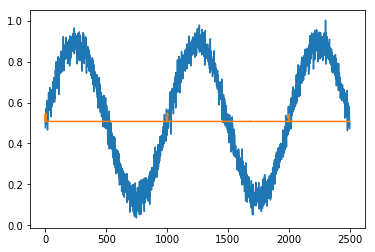

In [197]:

plt.plot((y_test))
plt.plot((y_pred))

In [218]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_shape=(None, layers[0]),
        units=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(units = layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="adam", metrics = ['mse'])
    print("> Compilation Time : ", time.time() - start)
    return model

In [219]:
model= build_model([1,50,100,1])
earlystop = EarlyStopping(monitor='val_mean_squared_error', min_delta=0.01, patience= 5, verbose=1, mode='auto')

> Compilation Time :  0.01296544075012207


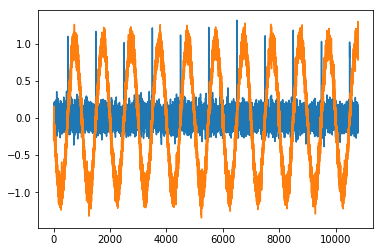

In [232]:
plt.plot(x_train[:, 499, 0])
plt.plot(y_train[:])

In [234]:
model_info = model.fit(x_train, y_train, batch_size = 2**11, epochs=100, validation_split=0.05, callbacks = [earlystop])

Train on 10259 samples, validate on 540 samples
Epoch 1/100
10259/10259 [==============================] - 11s 1ms/step - loss: 0.5122 - mean_squared_error: 0.5122 - val_loss: 0.5360 - val_mean_squared_error: 0.5360
Epoch 2/100
10259/10259 [==============================] - 11s 1ms/step - loss: 0.5132 - mean_squared_error: 0.5132 - val_loss: 0.5369 - val_mean_squared_error: 0.5369
Epoch 3/100
10259/10259 [==============================] - 11s 1ms/step - loss: 0.5120 - mean_squared_error: 0.5120 - val_loss: 0.5424 - val_mean_squared_error: 0.5424
Epoch 4/100
10259/10259 [==============================] - 12s 1ms/step - loss: 0.5113 - mean_squared_error: 0.5113 - val_loss: 0.5492 - val_mean_squared_error: 0.5492
Epoch 5/100
10259/10259 [==============================] - 12s 1ms/step - loss: 0.5113 - mean_squared_error: 0.5113 - val_loss: 0.5470 - val_mean_squared_error: 0.5470
Epoch 6/100
10259/10259 [==============================] - 12s 1ms/step - loss: 0.5111 - mean_squared_error: 0.5

In [235]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,1,figsize=(10,5))
    # summarize history for accuracy
    axs.plot(range(1,len(model_history.history['mean_squared_error'])+1),model_history.history['mean_squared_error'])
    axs.plot(range(1,len(model_history.history['val_mean_squared_error'])+1),model_history.history['val_mean_squared_error'])
    axs.set_title('Model MSE')
    axs.set_ylabel('mean_squared_error')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['val_mean_squared_error'])+1),len(model_history.history['val_mean_squared_error'])/10)
    axs.legend(['train', 'val'], loc='best')
    plt.show()

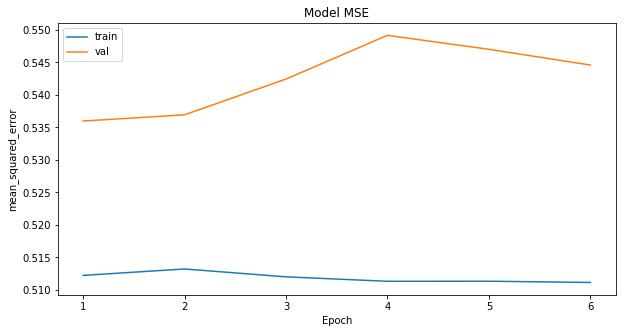

In [236]:
plot_model_history(model_info)

In [237]:
def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

In [238]:
predicted = predict_point_by_point(model, x_test)
predicted.shape

(1200,)

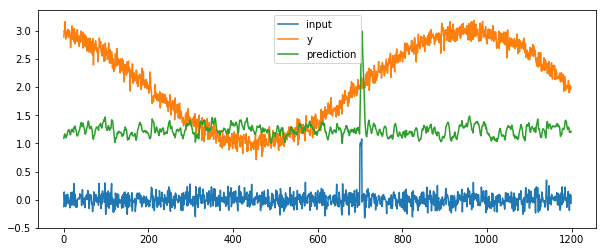

In [239]:
plt.figure(figsize = (10, 4))
x_test.shape
plt.plot(x_test[:, 499, 0], label = "input")
#plt.plot(y_test[], label = "output")
plt.plot(y_test[-x_test.shape[0]:] + 2, label = "y")
plt.plot(minmax_scale(predicted, feature_range=(-1,1)) + 2, label = "prediction")
plt.legend()

In [241]:
pp = model.predict(x_test)

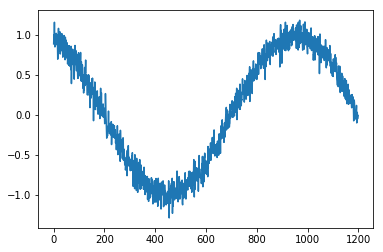

In [242]:
plt.plot(y_test)

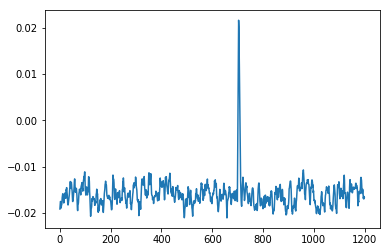

In [244]:
plt.plot(pp)

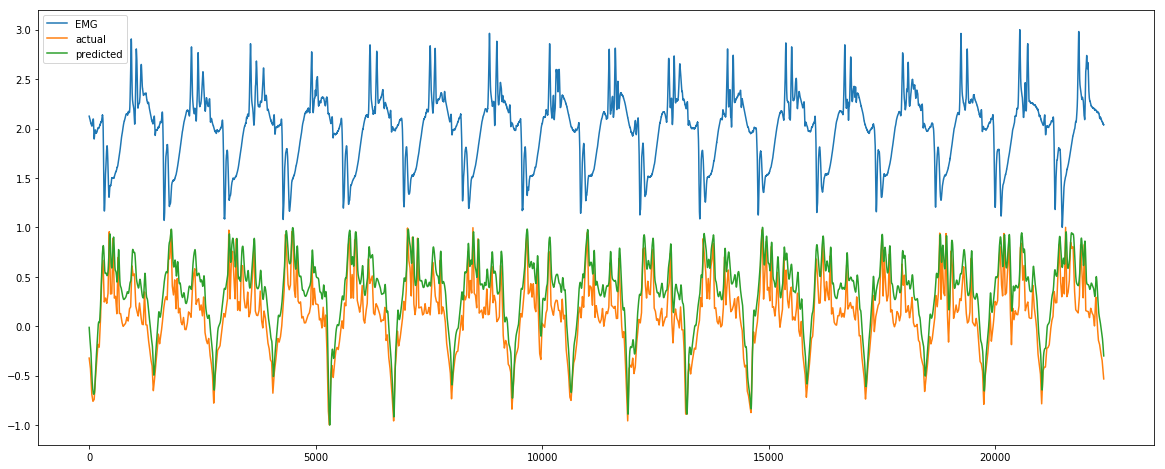

In [69]:


plt.figure(figsize = (20, 8))
plt.plot(comF.EMG_scaled[-len(predicted):].reset_index(drop = True)+ 2, label = "EMG")
plt.plot(comF.len_scaled[-len(predicted):].reset_index(drop = True), label = "actual")
plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

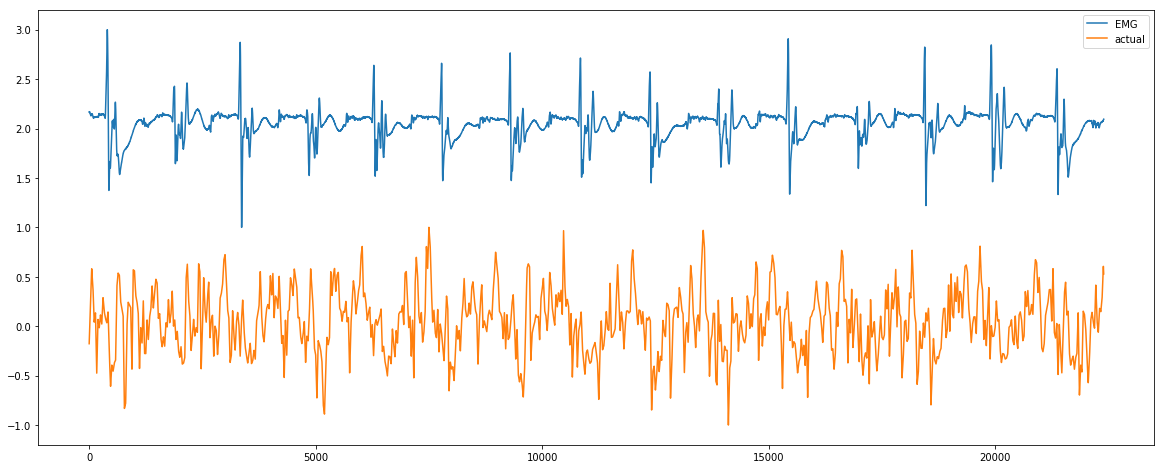

In [71]:
plt.figure(figsize = (20, 8))
plt.plot(comF.EMG_scaled[0:len(predicted)].reset_index(drop = True)+ 2, label = "EMG")
plt.plot(comF.len_scaled[0:len(predicted)].reset_index(drop = True), label = "actual")
#plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [72]:
x_test.shape

(22401, 1000, 1)

In [80]:
predicted = predict_point_by_point(model, x_train[0:25000,:,:])
predicted.shape

(25000,)

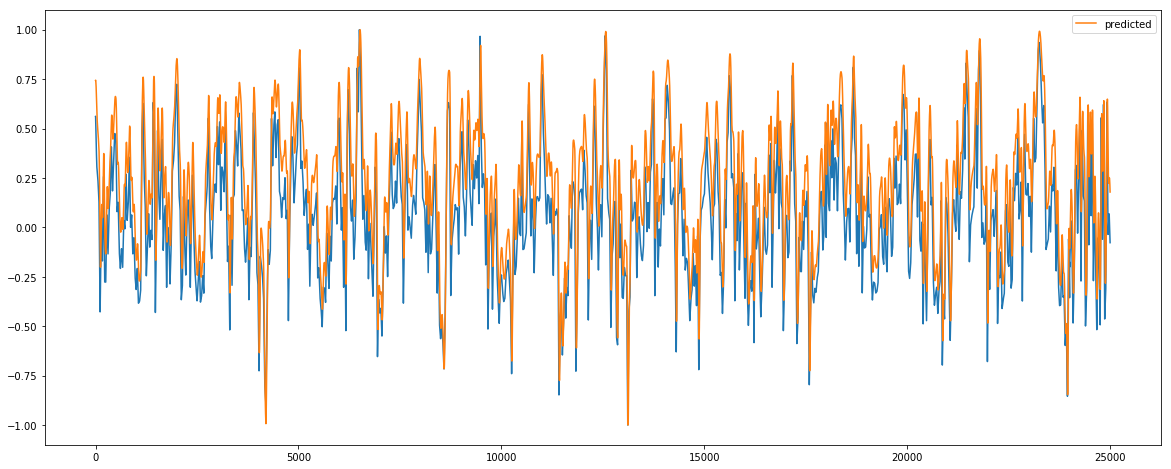

In [81]:

plt.figure(figsize = (20, 8))
plt.plot(x_train[0:25000, 999, 0])
plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [ ]:
comF.EMG_scaled[0:len(predicted)].reset_index(drop = True)

In [113]:
def reshape_dataTestONLY(sequence, ysequence, seq_len):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(sequence) - sequence_length):
        result.append(sequence[index: index + sequence_length])
    result = np.array(result)
    
    result2 = []
    for index in range(len(ysequence) - sequence_length):
        result2.append(ysequence[index: index + sequence_length])
    result2 = np.array(result2)

    # shuffle windows
    #shuffInt = np.random.choice(np.arange(0, train.shape[1]), replace=False, size=train.shape[1])
#     train = train[:, shuffInt]
#     train2 = train2[:, shuffInt]
    #np.random.shuffle(train)

    x_test = result[:, :-1]
    y_test = result2[:, -1]

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    
    
    return [x_test, y_test]

In [191]:
timesteps = np.arange(0, 0.5, 1/25000 )

freq = 25

trainY1 = np.sin(2*np.pi*timesteps* freq) + np.random.normal(size=len(timesteps))*0.1
trainX1 =  np.cos(2*np.pi*timesteps * freq) * ((np.cos(2*np.pi*timesteps*freq)) > 0.99)*1 + np.random.normal(size=len(timesteps))*0.1
trainY1.shape

(12500,)

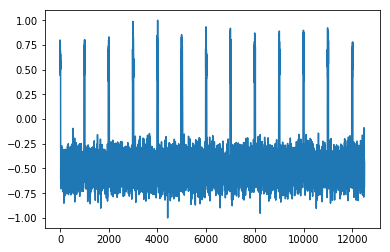

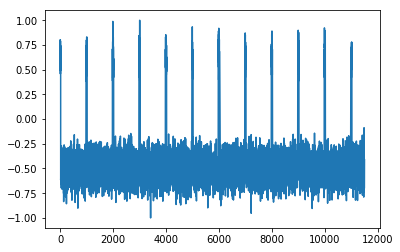

In [192]:
plt.plot(minmax_scale(trainX1[0:12500], (-1,1)))
x_test2, _ = reshape_dataTestONLY(minmax_scale(trainX1[0:12500], (-1,1)), trainY1, 1000)
plt.show()
plt.plot(x_test2[:, 999, 0])

In [95]:
predicted = predict_point_by_point(model, x_test2)
predicted.shape

(11499,)

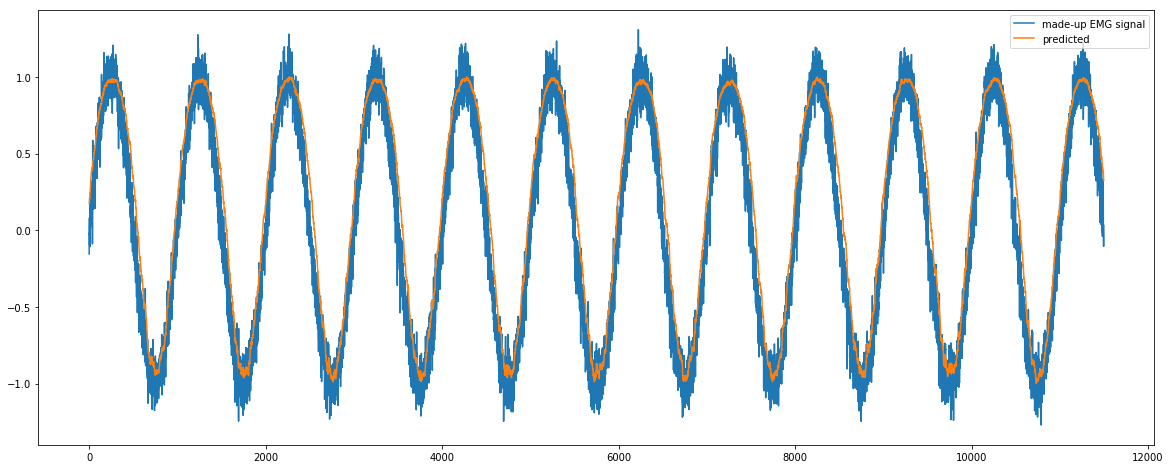

In [97]:
plt.figure(figsize = (20, 8))
plt.plot(x_test2[:, 999, 0], label = 'made-up EMG signal')
plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [32]:
propBreak = 0.9
windowLen = 200

backCt = int(len(trainX) - propBreak * len(trainX) + propBreak * windowLen)
print(backCt)

22680


In [33]:
plt.figure(figsize = (10,4))
plt.plot(trainY_scaled[-(backCt + 1):] + 2, label = "input data")
plt.plot(trainX_scaled[-(backCt-windowLen +1):], label = "data we're trying to predict")

plt.plot(x_test[:,0,0] + 2, label = "input data")
plt.plot(y_test[:], label = "ytest")
#plt.plot(yhat[-81:] -1, label = "smoothed")
plt.ylim([-2, 4])
plt.plot(predicted, label = 'predicted_LSTM')
plt.legend()
#plt.plot(y_test)
#plt.savefig(os.path.join(figDir, "LSTM_MadeUpData.png"), dpi = 500)


NameError: name 'trainY_scaled' is not defined

<Figure size 720x288 with 0 Axes>

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(trainY_scaled[-(backCt - windowLen +  1):] + 2, label = "input data")
plt.plot(trainX_scaled[-(backCt-windowLen +1):], label = "data we're trying to predict")

plt.plot(x_test[:,windowLen-1,0] + 2, label = "input data")
plt.plot(y_test[:], label = "ytest")

plt.ylim([-2, 4])
plt.plot(predicted, label = 'predicted_LSTM')
plt.legend()


In [ ]:
plt.plot(trainY_scaled[-(backCt + 1):] + 2, label = "input data")
plt.plot(trainX_scaled[(-backCt):], label = "data we're trying to predict")

In [ ]:
results = reshape_data(trainX, 50)

In [ ]:
np.random.shuffle(results)
results.shape

shuffInt = np.random.choice(np.arange(0, results.shape[1]), replace=False, size=results.shape[1])
results[:, shuffInt]

In [ ]:
shuffInt = np.random.choice(np.arange(0, result.shape[0]), replace=False, size=result.shape[0])
    train = train[:, shuffInt]